<a href="https://colab.research.google.com/github/jcmachicao/modpred_2/blob/main/modpred2__clasificacion_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**02.03**
#### Cuaderno 2, Ejercicio 3
#### **Curso Modelamiento Predictivo**
---
# **Modelamiento Predictivo para Textos**
* Autor: José Carlos Machicao
* Licencia: [GestioDinámica](http://www.gestiodinamica.com) 2020

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('punkt')
from string import punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [ ]:
textos = [
          ['daños', 'Entraron a la tienda y se llevaron todo lo que pudieron.'],
          ['tecnología', 'Felizmente que estaban encendidas las cámaras y todo fue registrado, porque las habíamos instalado hace unos meses.'],
          ['daños', 'La pérdida fue de más de dos millones de soles, porque se llevaron todo.'],
          ['tecnología', 'Tenemos alarmas que están encendidas todo el día.'],
          ['tecnología', 'Pudimos rastrear a los delincuentes porque tenemos sensores de movimientos violentos en casi todos los establecimientos'],
          ['daños', 'Hubo al menos 300 víctimas, de las cuales lamentablemente fallecieron 4.'],
          ['tecnología', 'Los patrulleros están preparados para terrenos difíciles y muchos de ellos tienen acondicionados servidores de análisis rápido.'],
          ['riesgo', 'Las mafias están organizadas y comunicadas en varios departamentos, y se sabe que se brindan ayuda entre ellas.'],
          ['riesgo', 'Hay datos acerca de cómo ha crecido la posibilidad de delincuencia en Trujillo porque los reportes son cada vez más frecuentes.'],
          ['daños', 'El asalto de varias viviendas en el distrito ha dejado más de 20 familias prácticamente en la pobreza.'],
          ['riesgo', 'El patrullaje es necesario porque reduce la presencia de criminales que pueden articularse en varios distritos.'],
          ['riesgo', 'Si no se implementa un sistema de monitoreo no lograremos contrarrestar a las mafias organizadas que se incrementan.'],
          ['tecnología', 'El sistema de monitoreo es imprescindible porque permite una cobertura amplia cuando se instala en todos los distritos.'],
          ['riesgo', 'Aquí en Puno ha crecido la delincuencia porque los reportes son cada vez más frecuentes con mayor probabilidad.'],
          ['daños', 'Las víctimas de agresiones en estos últimos años han tenido daños más remanentes.'],
          ['tecnología', 'Los patrulleros están preparados para instalarse en el primer trimestre, para que estén operativos inmediatamente después.'],
          ]
tex_df = pd.DataFrame(textos)
tex_df.columns = ['tipo', 'textos']

In [ ]:
tex_df.head()

,tipo,textos
0,daños,Entraron a la tienda y se llevaron todo lo que...
1,tecnología,Felizmente que estaban encendidas las cámaras ...
2,daños,La pérdida fue de más de dos millones de soles...
3,tecnología,Tenemos alarmas que están encendidas todo el día.
4,tecnología,Pudimos rastrear a los delincuentes porque ten...


In [ ]:
common_texts = tex_df.textos
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(common_texts)]
model = Doc2Vec(documents, vector_size=2, window=3, min_count=1, workers=4)
model.train(documents, total_examples=model.corpus_count, epochs=60)
vecs = []
for j in range(len(documents)):
  vecs.append(model.docvecs[j])
vecs_arr = np.array(vecs)
print(vecs_arr.shape)
tex_df['v1'] = vecs_arr[:,0]
tex_df['v2'] = vecs_arr[:,1]

(16, 2)


[]

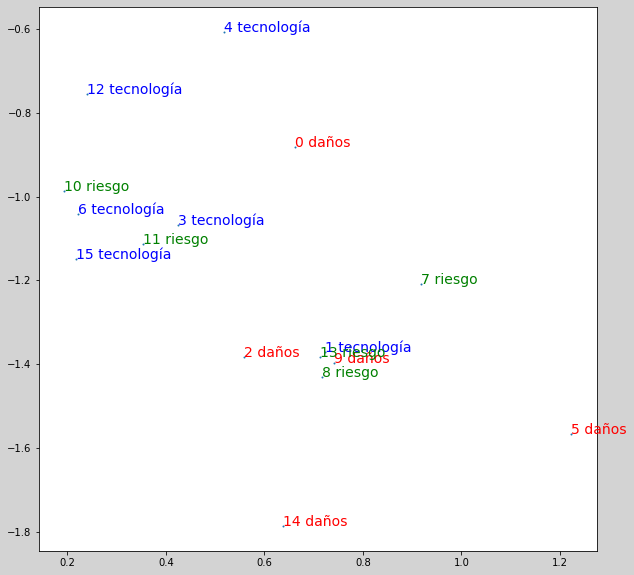

In [ ]:
colores = {'tecnología': 'blue', 'daños': 'red', 'riesgo': 'green'}
plt.figure(figsize=(10,10), facecolor='lightgray')
plt.scatter(tex_df.v1, tex_df.v2, s=1)

for k in range(len(tex_df)):
  plt.text(tex_df.v1[k], tex_df.v2[k], 
           str(k) + ' ' + tex_df.tipo[k], 
           c=tex_df['tipo'].map(colores)[k],
           fontsize=14
           )
plt.plot()

# Clasificación con Gaussian Naive-Bayes

In [ ]:
tex_df.head()

,tipo,textos,v1,v2
0,daños,Entraron a la tienda y se llevaron todo lo que...,-0.522241,-1.221504
1,tecnología,Felizmente que estaban encendidas las cámaras ...,1.550811,-1.714474
2,daños,La pérdida fue de más de dos millones de soles...,-1.391744,-1.446743
3,tecnología,Tenemos alarmas que están encendidas todo el día.,0.023029,-1.365300
4,tecnología,Pudimos rastrear a los delincuentes porque ten...,-0.117399,-0.964872


In [ ]:
X = tex_df[['v1', 'v2']]
X[0:3]

,v1,v2
0,-0.522241,-1.221504
1,1.550811,-1.714474
2,-1.391744,-1.446743


In [ ]:
factores = pd.factorize(tex_df.tipo)
y = factores[0]
rotulos = factores[1]

In [ ]:
y

array([0, 1, 0, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 1])

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
clf = GaussianNB()
clf.fit(X, tex_df.tipo)
y_pred = clf.predict(X)

In [ ]:
y_pred

array(['tecnología', 'daños', 'tecnología', 'riesgo', 'tecnología',
       'daños', 'tecnología', 'daños', 'riesgo', 'riesgo', 'tecnología',
       'tecnología', 'tecnología', 'riesgo', 'daños', 'tecnología'],
      dtype='<U10')

In [ ]:
list(rotulos)

['daños', 'tecnología', 'riesgo']

In [ ]:
print(confusion_matrix(tex_df.tipo, y_pred, labels=list(rotulos)))

[[2 2 1]
 [1 4 1]
 [1 2 2]]


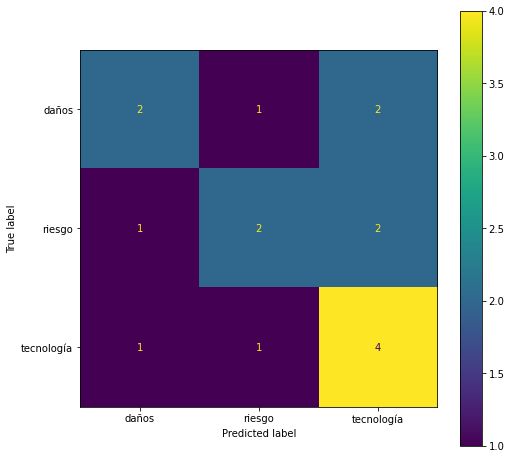

In [ ]:
fig, ax = plt.subplots(figsize=(8,8), facecolor='white')
plot_confusion_matrix(clf, X, tex_df.tipo, ax=ax)
plt.show()

In [ ]:
print(classification_report(tex_df.tipo, y_pred, labels=list(rotulos)))

              precision    recall  f1-score   support

       daños       0.50      0.40      0.44         5
  tecnología       0.50      0.67      0.57         6
      riesgo       0.50      0.40      0.44         5

    accuracy                           0.50        16
   macro avg       0.50      0.49      0.49        16
weighted avg       0.50      0.50      0.49        16



# Referencias

https://scikit-learn.org/stable/modules/naive_bayes.html